#US house pricing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import sklearn
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)

#ignore warning
import warnings
# warnings.simplefilterfilter(action = "ignore", category = FutureWarning)



full_data = pd.read_csv('/content/USA_Housing.csv')
full_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


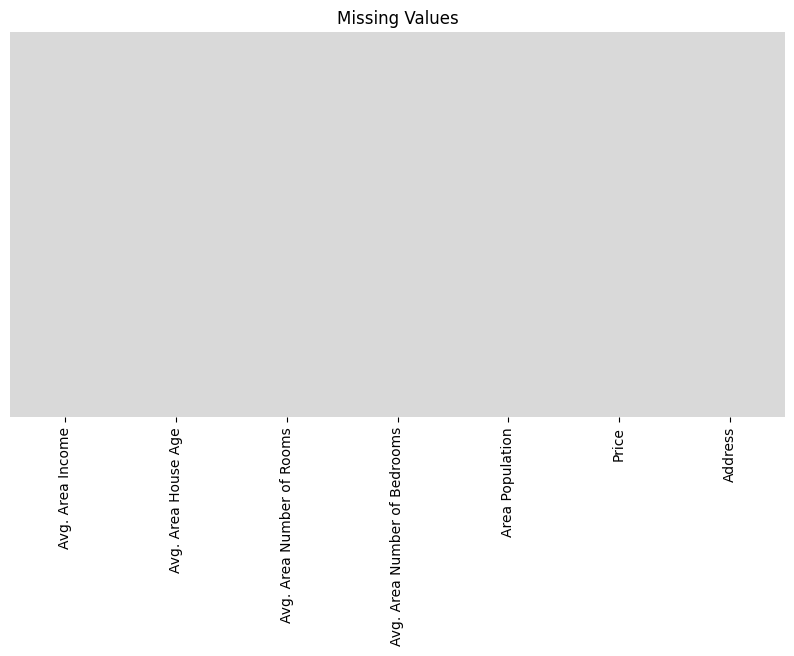

In [3]:
sns.heatmap(full_data.isnull(),yticklabels=False,cbar=False,cmap='tab20c_r')
plt.title('Missing Values')
plt.show()

In [4]:
full_data.isnull().sum()


,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0


In [ ]:
#Remove Address feature
full_data.drop("Address", axis=1, inplace=True)

In [ ]:
full_data.dropna(inplace=True)

In [ ]:
full_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [ ]:
full_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
#Shape of train data
full_data.shape

(5000, 6)

In [ ]:
#split data to be used in the model

#create matrix of feature
X = full_data.drop('Price',axis=1) #grabs everithing but "price"

#create the torget veriable
y = full_data['Price'] # y is the column we are trying to preduct

In [ ]:
X # Represent the feature
X.shape

(5000, 5)

In [ ]:
y # Represent the torget
y.shape

(5000,)

In [ ]:
#Use x and y veriables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .20 ,random_state = 101)

In [ ]:
x_train.shape
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3413,69048.788093,6.619712,6.123813,4.33,36817.368760
1610,67866.899929,5.393978,9.359022,5.44,43122.574176
3459,56636.238191,5.497667,7.121872,6.10,47541.431763
4293,79310.361977,4.247434,7.518204,4.38,43982.188957
1039,72821.247664,6.480819,7.116655,5.33,40594.059297
...,...,...,...,...,...
4171,56610.642563,4.846832,7.558137,3.29,25494.740298
599,70596.850945,6.548274,6.539986,3.10,51614.830136
1361,55621.899104,3.735942,6.868291,2.30,63184.613147
1547,63044.460096,5.935261,5.913454,4.10,32725.279544


In [ ]:
# y train shape
y_train

,Price
3413,1.305210e+06
1610,1.400961e+06
3459,1.048640e+06
4293,1.231157e+06
1039,1.391233e+06
...,...
4171,7.296417e+05
599,1.599479e+06
1361,1.102641e+06
1547,8.650995e+05


In [ ]:
x_test.shape
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1718,66774.995817,5.717143,7.795215,4.32,36788.980327
2511,62184.539375,4.925758,7.427689,6.22,26008.309124
345,73643.057298,6.766853,8.337085,3.34,43152.139577
2521,61909.041438,6.228343,6.593138,4.29,28953.925377
54,72942.705059,4.786222,7.319886,6.41,24377.909049
...,...,...,...,...,...
3900,77615.851343,6.200603,6.909327,2.27,36591.523448
3753,66925.199349,5.153050,8.396903,3.16,42590.685170
3582,71778.026176,5.921280,7.411045,4.00,37634.041316
2392,87272.093393,5.025866,7.184765,5.39,7522.333138


In [ ]:
#Moder Training

#fit
#import model
from sklearn.linear_model import LinearRegression

#create instance(row) of model
lin_reg = LinearRegression()

#pass training data into model
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Model Testing

#class preduction
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(1000,)
[1257919.729097    822112.41884197 1740669.05865495  972452.12917494
  993422.26329315  644126.07414456 1073911.79101682  856584.00194133
 1445318.25518365 1204342.19071175 1455792.46212863 1298556.65696433
 1735924.33836095 1336925.7757779  1387637.43231922 1222403.77772069
  613786.28691982  963933.54416267 1221197.33050139 1198071.57563599
  505861.89531673 1769106.54723353 1853881.16842511 1200369.50507868
 1065129.1285072  1812033.73067313 1768686.47091262 1439920.83814323
 1387251.99649376 1541178.39224181  726418.80504278 1754497.60908688
 1462185.72653198 1025600.16081145 1284926.8685155   917454.59590853
 1187046.94956865  999330.91117488 1329536.63409595  782191.60441437
 1393272.03053841  578216.88394851  822643.37151048 1895533.11413226
 1672019.8489204   966926.45434583 1129674.55638146  792797.75914663
 1161057.18412143 1472396.71417164 1457656.70412313 1162939.334229
 1099453.68110992 1358107.44619413  841103.70380593  986322.30573616
 1123323.53002134 1253538.63

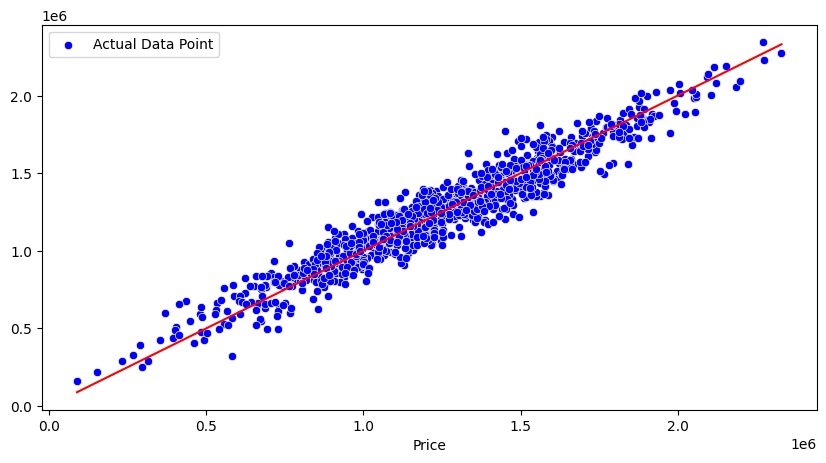

In [ ]:
sns.scatterplot(x=y_test , y=y_pred , color='Blue',label='Actual Data Point')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal line')
plt.show()

In [ ]:
#combine actual and preducted values side by side
result = np.column_stack((y_test, y_pred))

In [ ]:
#printing the result
print('Actual values : Preducted values')
print('-------------------------')
for actual, predict in result:
  print(f"{actual: 14.2f} : {predict:12.2f}")


Actual values : Preducted values
-------------------------
    1251688.62 :   1257919.73
     873048.32 :    822112.42
    1696977.66 :   1740669.06
    1063964.29 :    972452.13
     948788.28 :    993422.26
     730043.65 :    644126.07
    1166925.15 :   1073911.79
     705444.12 :    856584.00
    1499988.88 :   1445318.26
    1288199.15 :   1204342.19
    1441736.76 :   1455792.46
    1279681.15 :   1298556.66
    1754969.16 :   1735924.34
    1511653.45 :   1336925.78
    1441956.20 :   1387637.43
    1119992.62 :   1222403.78
     727866.53 :    613786.29
    1138885.10 :    963933.54
    1074263.32 :   1221197.33
    1386473.37 :   1198071.58
     404643.60 :    505861.90
    1449829.49 :   1769106.55
    1775874.76 :   1853881.17
    1202050.58 :   1200369.51
    1105737.46 :   1065129.13
    1835564.69 :   1812033.73
    1795428.77 :   1768686.47
    1424283.37 :   1439920.84
    1365945.08 :   1387252.00
    1492011.50 :   1541178.39
     624432.97 :    726418.81
    1827476

In [ ]:
#Residual Analysis
residual = actual-y_pred.reshape(-1)
print(residual)

[-6.97228472e+04  3.66084463e+05 -5.52472177e+05  2.15744753e+05
  1.94774619e+05  5.44070808e+05  1.14285091e+05  3.31612880e+05
 -2.57121373e+05 -1.61453088e+04 -2.67595580e+05 -1.10359775e+05
 -5.47727456e+05 -1.48728894e+05 -1.99440550e+05 -3.42068958e+04
  5.74410595e+05  2.24263338e+05 -3.30004486e+04 -9.87469372e+03
  6.82334987e+05 -5.80909665e+05 -6.65684287e+05 -1.21726232e+04
  1.23067753e+05 -6.23836849e+05 -5.80489589e+05 -2.51723956e+05
 -1.99055115e+05 -3.52981510e+05  4.61778077e+05 -5.66300727e+05
 -2.73988845e+05  1.62596721e+05 -9.67299866e+04  2.70742286e+05
  1.14993234e+03  1.88865971e+05 -1.41339752e+05  4.06005277e+05
 -2.05075149e+05  6.09979998e+05  3.65553510e+05 -7.07336232e+05
 -4.83822967e+05  2.21270428e+05  5.85223255e+04  3.95399123e+05
  2.71396978e+04 -2.84199832e+05 -2.69459822e+05  2.52575477e+04
  8.87432008e+04 -1.69910564e+05  3.47093178e+05  2.01874576e+05
  6.48733519e+04 -6.53417504e+04 -2.40082781e+05  6.89093673e+05
 -2.74620202e+05  7.94525

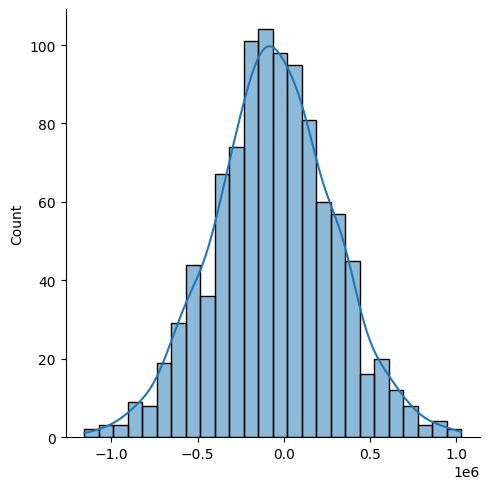

In [ ]:
#distribution plot for residual (defrence between residula and preducted values)
sns.displot(residual, kde=True)

In [ ]:
#Model Evaluation

#score it
from sklearn.metrics import mean_squared_error

print('Leaner Regrassion Model')
#result
print('--'*30)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

#print evaluation metrics
print("mean_squared_error" , mse)
print("Root, mean_squared_error", rmse)

Leaner Regrassion Model
------------------------------------------------------------
mean_squared_error 10100187858.864885
Root, mean_squared_error 100499.69083964829


#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
rf_regressor = DecisionTreeRegressor
rf_regressor.fit(x_train, y_train)

#preducting the saleprices using
y_pred_rf = rf_regressor.predict(x_test)

DTr = mean_squared_error (y_pred_rf, y_test)
#Rendom Forest Regression Accuracy with test set
print("Decision Tree Regression", DTr)

AttributeError: 'DataFrame' object has no attribute '_validate_params'